In [2]:
%load_ext tikzmagic

---
slug: "/blog/modelselectionandvalidation"
date: "2021-04-22"
title: "Model Selection and Validation"
category: "1 Machine Learning"
order: 7
---

### Introduction

Without the use of proper metrics and the appropriate validation approach during training, one cannot be confident that a trained model will indeed perform well in the wild.
This post goes into the basics of choosing a metric for a model and the $K$-fold cross validation method for validating models. 
The bias-variance problem in model selection is also touched upon briefly.

### Performance Metrics

#### Confusion Matrix

A confusion matrix is a table that compares a models predicted class selections with the actual class labels in the dataset.
From top right corner to the bottom left corner, the entries of the confusion matrix are the true positive count, the false positive count, the false negative count, and the false positive count. 
The true positive count is the number of data points correctly predicted as true and the true negative count is the number of data points correctly predicted as false.
The false positive count is the number of data points predicted true that are actually false, and the false negative count is the number of data points predicted false that are actually true.
It should be noted that the example confusion matrix below only handles cases of binary classification.
Generally speaking the confusion matrix is of dimensions $K \times K$, where $K$ is the total number of possible classes.

|   |Actual True|Actual False|
|:-:|:---------:|:----------:|
|Predicted True| TP | FP |
|Predicted False| FN | TN |

#### Metrics

A variety of metrics can be used to evaluate a trained model's performance given a particular dataset. 
The list below displays some of those metrics.
All of the displayed metrics are shown with a definition formed by components of the confusion matrix, and are only applicable for classification problems.
For regression problems, common evaluation metrics are mean squared error and mean absolute error.
The appropriate metric to be used is dependent on the problem being examined as well as the desired goals for a model.

$$
\begin{aligned}
    acc &= \frac{TP + TN}{TP + TN + FP + FN} & \text{Accuracy}\\
    err &= \frac{FP + FN}{TP + TN + FP + FN} & \text{Error Rate}\\
    TPR &= \frac{TP}{TP + FN} &\text{True Positive Rate or Recall}\\
    TNR &= \frac{TN}{TN + FP} &\text{True Negative Rate or Specificity}\\
    FPR &= \frac{FP}{FP + TN} &\text{False Positive Rate}\\
    PPV &= \frac{TP}{TP + FP} &\text{Positive Predictive Value or Precision}\\
    F &= \frac{2TP}{2TP + FP + FN} & \text{F1 score}\\
\end{aligned}
$$

#### PR Curve and ROC Curve

The ROC curve measures the trade-off between the true and false positive rates at different thresholds and the PR curve measures the trade-off between precision and recall (hence, PR) at different thresholds.
For both ROC and PR curves, the thresholds are defined by the inclusion of each data point.
The metrics for each curve calculated at each data point and added to the curve. 

With regard to the ROC curve, a good model will have a high true positive rate, and a low false positive rate. 
Given a PR curve, a model with good performance will have both a high precision and a high recall.
With no modification, both curves are used only in binary classification, although one can adopt a one-vs-all approach for multiclass situations.
ROC curves are often more popular in cases where class outputs are balanced, while PR curves may be a better fit when class outputs are not balanced.

### Bias and Variance

The bias-variance tradeoff is a well known general problem that occurs during the training of any supervise machine learning model.
Bias is the average difference between model output and true values.
Variance measures a model's variability in output given the dataset it is trained on.

As model complexity increases, variance increases and bias decreases.
Variance that is too high will lead to overfitting of the training data, and bias that is too high will lead to underfitting on the training data.
Overfitting occurs when a model performs well on a training data set, but is not able to generalize to unseen data. 
Underfitting occurs when a model is not able to perform well on the training data set.
Ideally, one needs to choose a model with sufficient complexity to learn from the availabe training data, but not so high that overfitting occurs.

$$
\begin{aligned}
    E_{x,y,D} \left[ (h_D(x) - y)^2 \right] &= 
    E_x \left[ (\bar{h}(x) - \bar{y}(x))^2 \right] +
    E_{x, D} \left[ h_D(x) - \bar{h}(x))^2 \right] +
    E_{x, y} \left[ (\bar{y}(x) - y)^2 \right] \\
    \text{Bias} &= E_x \left[ (\bar{h}(x) - \bar{y}(x))^2 \right]\\
    \text{Variance} &= E_{x, D} \left[ h_D(x) - \bar{h}(x))^2 \right]\\
    \text{Noise} &= E_{x, y} \left[ (\bar{y}(x) - y)^2 \right] \\
    \text{Expected Test Error} &= \text{Bias}^2 + \text{Variance} +  \text{Noise}\\
\end{aligned}
$$

The bias variance decomposition derivation for mean squared error is shown below:

$$
\begin{aligned}
    E \left[ (h_D(x) - y)^2 \right] &= E_{x,y,D}\left[ (h_D(x) + \bar{h}(x) - \bar{h}(x) - y)^2 \right]&\text{EQ 1}\\
    &= E_{x,y,D}\left[ ((h_D(x) - \bar{h}(x)) + (\bar{h}(x) - y))^2 \right]\\
    &= E_{x,y,D}\left[ 
        (h_D(x) - \bar{h}(x))^2 + 
        2(h_D(x) - \bar{h}(x))(\bar{h}(x) - y)+ 
        (\bar{h}(x) - y)^2 
    \right]\\
    &= 
    E_{x,D}\left[(h_D(x) - \bar{h}(x))^2\right] +
    2E_{x,y,D}\left[ (h_D(x) - \bar{h}(x))(\bar{h}(x) - y)\right] +
    E_{x,y}\left[ \bar{h}(x) - y)^2\right]\\
    &= 
    E_{x,D}\left[(h_D(x) - \bar{h}(x))^2\right] +
    \text{EQ 2} +
    E_{x,y}\left[ \bar{h}(x) - y)^2\right]\\
    &= 
    E_{x,D}\left[(h_D(x) - \bar{h}(x))^2\right] +
    E_{x,y}\left[ \bar{h}(x) - y)^2\right]\\
    &= 
    E_{x,D}\left[(h_D(x) - \bar{h}(x))^2\right] +
    \text{EQ 3}\\
    &= 
    E_{x,D}\left[(h_D(x) - \bar{h}(x))^2\right] +
    E_x\left[(\bar{h}(x) - \bar{y}(x))^2\right] +
    E_{x,y}\left[(\bar{y}(x) - y)^2\right]\\
    2E_{x,y,D}\left[ (h_D(x) - \bar{h}(x))(\bar{h}(x) - y)\right] 
    &= 2E_{x,y}\left[ E_D\left[(h_D(x) - \bar{h}(x))\right]  (\bar{h}(x) - y) \right] & \text{EQ 2}\\
    &= 2E_{x,y}\left[ (E_D\left[ h_D(x) \right] - \bar{h}(x))  (\bar{h}(x) - y) \right]\\
    &= 2E_{x,y}\left[ (\bar{h}(x) - \bar{h}(x))  (\bar{h}(x) - y) \right]\\
    &= 2E_{x,y}\left[ 0 (\bar{h}(x) - y) \right]\\
    &= 0\\
    E_{x,y}\left[ (\bar{h}(x) - y)^2\right] &=  
    E_{x,y}\left[ (\bar{h}(x) + \bar{y}(x) - \bar{y}(x) - y)^2\right] & \text{EQ 3}\\  
    &=
    E_{x,y}\left[ ((\bar{h}(x) - \bar{y}(x)) + (\bar{y}(x) - y))^2\right]\\  
    &= 
    E_{x,y}\left[ 
        (\bar{h}(x) - \bar{y}(x))^2 + 
        2(\bar{h}(x) - \bar{y}(x))(\bar{y}(x) - y) +
        (\bar{y}(x) - y)^2
    \right]\\  
    &=
    E_x\left[(\bar{h}(x) - \bar{y}(x))^2\right] +
    2E_{x,y}\left[(\bar{h}(x) - \bar{y}(x))(\bar{y}(x) - y)\right] +
    E_{x,y}\left[(\bar{y}(x) - y)^2\right]\\
    &=
    E_x\left[(\bar{h}(x) - \bar{y}(x))^2\right] +
    \text{EQ 4} +
    E_{x,y}\left[(\bar{y}(x) - y)^2\right]\\
    &=
    E_x\left[(\bar{h}(x) - \bar{y}(x))^2\right] +
    E_{x,y}\left[(\bar{y}(x) - y)^2\right]\\
    2E_{x,y} \left[ (\bar{h}(x) - \bar{y}(x)) (\bar{y}(x) - y)  \right] &=
    2E_{x} \left[ (\bar{h}(x) - \bar{y}(x)) E_{y|x}\left[ (\bar{y}(x) - y) \right]\right] &\text{EQ 4}\\
    &=
    2E_{x} \left[ (\bar{h}(x) - \bar{y}(x)) (\bar{y}(x) - E_{y|x}\left[ y\right])\right] \\
    &=
    2E_{x} \left[ (\bar{h}(x) - \bar{y}(x)) (\bar{y}(x) - \bar{y}(x))\right] \\
    &=
    2E_{x} \left[ (\bar{h}(x) - \bar{y}(x)) 0\right] \\
    &= 0
    \\
\end{aligned}
$$

### Validation

In order to validate a model's performance, it must be tested on a data set different than the one used to train the model. 
Otherwise, the model's performance may be somewhat deceptive.
Just because a model performs well on training data that does not mean that it will perform well on previously unseen data.
This may occur if the model has overfit on the training data.

A popular way to test a model's performance, with some assurance that the model is not overfitting to training data is $K$-fold cross validation.
$K$-fold cross validation is a process that involves splitting an available data set into $K$ parts, using one part to test and the remaining parts to train. 
The model can then be tested $K$ times, by shifting the split that is used as a testing split.
The final model testing output is then the average taken across $K$ tests.
The diagram below shows how training and testing would work on a data set using $4$-fold validation.

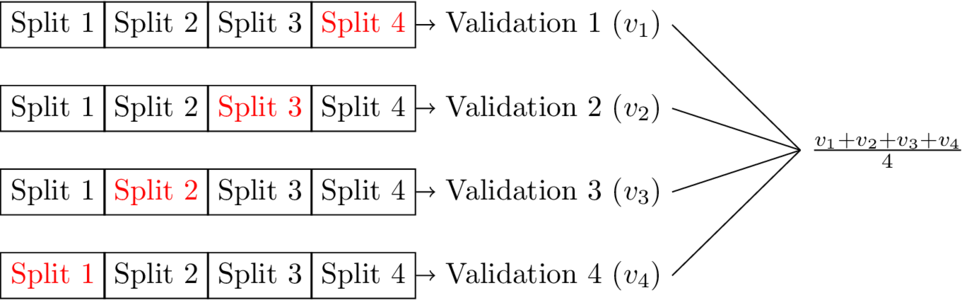

In [71]:
%%tikz -s=974,300 -sc=2
\node[draw, rectangle] (s11) at (0.00, 0.0) {\color{red}Split 1};
\node[draw, rectangle] (s12) at (0.62, 0.0) {Split 2};
\node[draw, rectangle] (s13) at (1.24, 0.0) {Split 3};
\node[draw, rectangle] (s14) at (1.86, 0.0) {Split 4};
\node[draw, rectangle] (s21) at (0.00, 0.5) {Split 1};
\node[draw, rectangle] (s22) at (0.62, 0.5) {\color{red}Split 2};
\node[draw, rectangle] (s23) at (1.24, 0.5) {Split 3};
\node[draw, rectangle] (s24) at (1.86, 0.5) {Split 4};
\node[draw, rectangle] (s31) at (0.00, 1.0) {Split 1};
\node[draw, rectangle] (s32) at (0.62, 1.0) {Split 2};
\node[draw, rectangle] (s33) at (1.24, 1.0) {\color{red}Split 3};
\node[draw, rectangle] (s34) at (1.86, 1.0) {Split 4};
\node[draw, rectangle] (s41) at (0.00, 1.5) {Split 1};
\node[draw, rectangle] (s42) at (0.62, 1.5) {Split 2};
\node[draw, rectangle] (s43) at (1.24, 1.5) {Split 3};
\node[draw, rectangle] (s44) at (1.86, 1.5) {\color{red}Split 4};
\node (t1) at (3, 0.0) {Validation 4 ($v_4$)};
\node (t2) at (3, 0.5) {Validation 3 ($v_3$)};
\node (t3) at (3, 1.0) {Validation 2 ($v_2$)};
\node (t4) at (3, 1.5) {Validation 1 ($v_1$)};
\node (v) at (5, 0.75) {$\frac{v_1 + v_2 + v_3 + v_4}{4}$};
\draw[->] (s14) -- (t1);
\draw[->] (s24) -- (t2);
\draw[->] (s34) -- (t3);
\draw[->] (s44) -- (t4);
\draw[-] (t1.east) -- (v.west);
\draw[-] (t2.east) -- (v.west);
\draw[-] (t3.east) -- (v.west);
\draw[-] (t4.east) -- (v.west);

### Resources

- Bishop, Christopher M. *Pattern Recognition and Machine Learning*. Springer, 2006.
- Hastie, Trevor, et al. *The Elements of Statistical Learning: Data Mining, Inference, and Prediction*. Springer, 2009.
- Weinberger, Kilian. *Lecture 12: Bias-Variance Tradeoff*. Machine Learning for Intelligent Systems. 2017. https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote12.html. Accessed 27 Apr. 2021.